# Закономерности, определяющие успешность игры в интернет-магазине «Стримчик» и планирование рекламной кампании

**Интернет-магазин «Стримчик»** продаёт по всему миру компьютерные игры. 


## Изучение данных из файла

Откройем файл с данными и изучим общую информацию.

Путь к файлу:
/datasets/games.csv

О качестве данных ничего не известно. Поэтому перед проверкой понадобится обзор данных.
Проверяем данные на ошибки и оцениваем их влияние на исследование. 
Затем, на этапе изучения и подготовки данных ищем возможность исправить самые критичные ошибки данных.

Таким образом, исследование пройдёт в **пять этапов**:

-  Изучение данных.
-  Подготовка данных.
-  Проведение исследовательского анализа данных.
-  Составление портрета пользователя каждого региона (NA, EU, JP).
-  Проверка гипотез.
-  Общий вывод.

Исследование:

In [1]:
# импорт библиотек
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# чтение файла с данными и сохранение 
df = pd.read_csv('/datasets/games.csv')

**Описание данных**:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


**Примечание:**

ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
cols = df.columns[:20] 

In [7]:
colours = ['#000099', '#ffff00'] 

<AxesSubplot:>

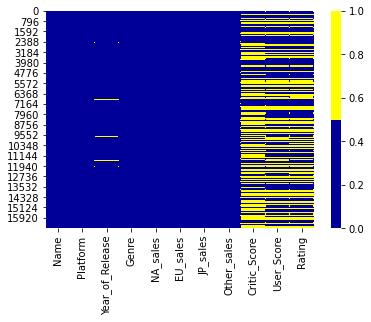

In [8]:
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours)) # желтый - пропущенные данные, синий - не пропущенные

In [9]:
#поиск дубликатов
df.duplicated().sum() 

0

In [10]:
df.isna().sum().sort_values(ascending = False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

In [11]:
round(df.isna().sum()/df.shape[0]*100).sort_values(ascending = False) 

Critic_Score       51.0
User_Score         40.0
Rating             40.0
Year_of_Release     2.0
Name                0.0
Platform            0.0
Genre               0.0
NA_sales            0.0
EU_sales            0.0
JP_sales            0.0
Other_sales         0.0
dtype: float64

In [12]:
#проверим уникальные значения в столбце название игры
len(df['Name'].unique())

11560

In [13]:
#проверим уникальные значения в столбце платформа
len(df['Platform'].unique())

31

In [14]:
#проверим уникальные значения в столбце платформа
df['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

Можно сделать вывод,что из 16713 игр, которые представлены в наших данных, 11560 только уникальны,т.е. часть игр представлены на нескольких платформах.Самые популярные платформы: PS2,DS,PS3,Wii,X360,PSP.

In [15]:
#проверим уникальные значения в столбце год выпуска
df['Year_of_Release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

In [16]:
#проверим уникальные значения в столбце год выпуска
len(df['Year_of_Release'].unique())

38

Игры, кoторые прелставлены в данных, выпущены с период с 1980 по 2016 года и большая часть игр выпущены после 2000 года.

In [17]:
#проверим уникальные значения в столбце жанр игры
len(df['Genre'].unique())

13

In [18]:
#проверим уникальные значения в столбце жанр игры
df['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

В наших данных 13 разных жанров игр

In [19]:
#проверим уникальные значения в столбце рейтинг от организации ESRB 
len(df['Rating'].unique())

9

In [20]:
#проверим уникальные значения в столбце рейтинг от организации ESRB 
df['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

В наших данных 9 разных рейтингов от организации ESRB 

In [21]:
#проверим уникальные значения в столбце оценка пользователей
len(df['User_Score'].unique())

97

In [22]:
#проверим уникальные значения в столбце оценка пользователей
df['User_Score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.2       2
1.9       2
0.5       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

В данных оценки пользователей странные данные **tbd**. Вот что нашли в интернете: эта аббревиатура не скрывает в себе никаких таинственных смыслов и расшифровывается очень просто - To Be Determined, то есть "Будет определено". Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода". Стоит отметить также, что у этой аббревиатуры могут быть и иные значения, например To Be Done - должно быть сделано, или To Be Discussed - подлежит обсуждению.

In [23]:
#проверим уникальные значения в столбце оценка критиков
len(df['Critic_Score'].unique())

83

In [24]:
#проверим уникальные значения в столбце оценка критиков
df['Critic_Score'].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
29.0      3
13.0      1
22.0      1
17.0      1
21.0      1
Name: Critic_Score, Length: 82, dtype: int64

**Вывод:**

В данных 11 столбцов и 16715 строк.
    
1.**Пропуски с столбцах**:
- Name — название игры **2**
- Year_of_Release — год выпуска **269**
- Genre — жанр игры **2** 
- Critic_Score — оценка критиков (максимум 100) **8578**
- User_Score — оценка пользователей (максимум 10) **6701**
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию **6766**

2.**Строчные с прописными буквами**  

3.**Не правильный тип данных**:   
- Year_of_Release — год выпуска
- User_Score — оценка пользователей (максимум 10)
   
    
    


## Подготовка данных

In [25]:
#приведем всё к нижнему регистру
#df = df.apply(lambda x: x.astype(str).str.lower())
df.columns = df.columns.str.lower()

In [26]:
#проверим
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [27]:
#проверим что за пропуски в названии игры
df[df['name'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


2 игры 1993 года,без рейтинга, с очень маленькими продажами,также по ним пропуски по жанру игры.

In [28]:
# убераем пропуски в названии игры и заодно в жанре игры
df.dropna(subset=['name'], inplace=True)

In [29]:
# заменим значение tbd на значение nan,т.к. пользователи еще не оценили игры и нет данных
df['user_score'] = df['user_score'].replace('tbd',np.nan)

In [30]:
#заменим пропуски на отсутствие рейтинга 'No_rating'
df['rating'] = df['rating'].replace(np.nan, 'No_rating')

In [31]:
#проверим что за пропуски по году выпуска
df[df['year_of_release'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,No_rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,No_rating
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,No_rating


В таблице 269 пропусков,которые можно заменить,поискав данные об игре в интернете.Но это трудоемкий и долгий процесс,да и пропусков всего 2%, то можем ими пожертовать и удалить

In [32]:
# убераем пропуски в годе выпуска игры
df.dropna(subset=['year_of_release'], inplace=True)

In [33]:
# изменим типа данных в оценке пользователей
df['user_score'] = df['user_score'].astype('float')

In [34]:
# изменим типа данных в годе выпуска
df['year_of_release'] = df['year_of_release'].astype('int')

In [35]:
#проверим что за пропуски по оценке критиков
df[df['critic_score'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No_rating
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No_rating
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,No_rating
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,No_rating
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,No_rating
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,No_rating
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,No_rating
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No_rating
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,No_rating


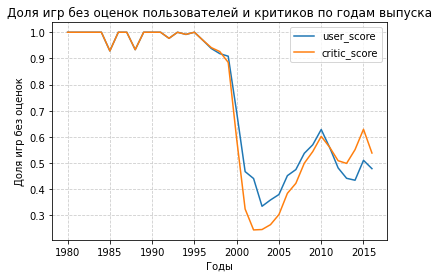

In [36]:
#определим долю иг без оценок пользователей и критиков
fig, ax = plt.subplots()
(df.groupby('year_of_release')[['user_score', 'critic_score']].agg(lambda x: x.isna().sum() / len(x)).plot(ax=ax))
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')
ax.set_xlabel('Годы')
ax.set_ylabel('Доля игр без оценок')
ax.set_title('Доля игр без оценок пользователей и критиков по годам выпуска')
plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.0+ MB


Пропуски по оценке критиков, оценке пользователей и рейтингу совпадают, нельзя точно утверждать с чем это связано,т.к. пропуски есть во всех годах.Оставляем пропуски без изменений.ESRB была основана в 1994 году,поэтому до 1994 года не стоит рейтинг, после 1994 года у игр с пропусками слишком маленькие продажи скорее всего эти игры не оценивались.

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец 'sales', для этого найдем сумму миллионов проданных копий в Северной Америке, в Европе, в Японии и в других странах:

In [38]:
#посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец 'sales'
df['sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [39]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No_rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,No_rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,No_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No_rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,No_rating,0.01


**Вывод:**
-  привели названия столбцов к нижнему регистру
-  убрали 2 строки с пропусками в названии игры
-  убрали 269 строк пропусков в годе выпуска
-  изменили тип данных в оценке пользователей и годе выпуска
-  изменили значение tbd на NaN в оценках пользователей
-  добавили новый столбец суммарных продаж по всем регионам sales 

## Проведение исследовательского анализа данных

### Посмотрим, сколько игр выпускалось в разные годы и определим важны ли данные за все периоды

In [40]:
#посчитаем сумму, среднее количество, дисперсию и стандартное отклонение по суммарным продажам по всем регионам за каждый год
df.groupby('year_of_release').agg({'sales':['sum','median','mean','var','std']}).style.format("{:.2f}")

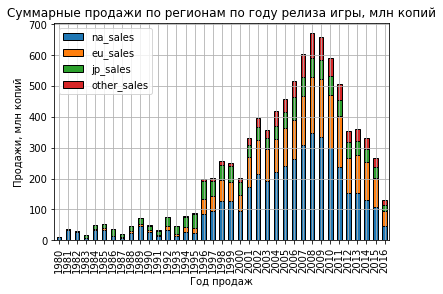

In [41]:
# посчитаем сколько игр выпускалось в разные годы по разным регионам
df.groupby('year_of_release')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].agg('sum')\
.plot(kind='bar',stacked=True,grid=True,edgecolor='black')
plt.title('Суммарные продажи по регионам по году релиза игры, млн копий')
plt.xlabel('Год продаж')
plt.ylabel('Продажи, млн копий')
plt.show()

Из данных можно сделать вывод,что до 2000 г. продажи были не вилики, на 2008-2009гг. пришелся пик продаж и потом началось падение, что выгядит странно,т.к. геймеры не стали меньше играть.

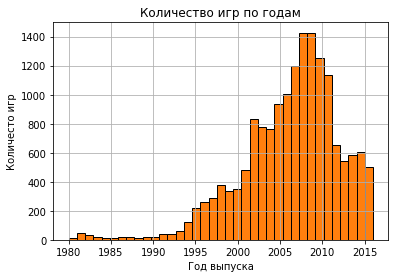

In [42]:
# посчитаем сколько игр выпускалось в разные годы суммарно
df['year_of_release'].plot(grid=True,kind='hist',bins=37, edgecolor='black',color='tab:orange')
plt.title('Количество игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количесто игр')
plt.show()

- Высокие продажи наблюдались после 2005 г.Возьмем период с 2005 г. за анализируемый, т.к. на этот период приходится рост продаж игр. 
- До 1995 г. выпускалось совсем мало игр.
- Пик продаж количеста игр выпадает на 2008 г.и 2009 г., с 2011 г. резкое снижение, что может быть обусловлено тем,что игры стали дорогими. "В 2012 г. New-York Times писала, что игры становятся для американцев дорогим развлечением и для многих проще раз в месяц покупать подписку по цене билета в кино на одну единственную игру, чем тратить по 60 долларов хотя бы раз в месяц".Тогда же начали стремительно расти мобильные игры. Поскольку в новых условиях многие были не готовы бежать за новой консолью, а вот смартфоны, которые после выхода iPhone заняли важнейшее место, пришлись очень кстати.
- Рынок стал перестраиваться на онлайновые рельсы. Многие разработчики, которым сложно было потянуть крупный онлайн-проект, уходили в новую нишу – браузерные игры, которые со временем потихоньку перетекли в мобильные игры и так далее.

### Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и постром распределение по годам. Узнаем за какой характерный срок появляются новые и исчезают старые платформы

In [43]:
#посчитаем сумму, среднее количество, дисперсию и стандартное отклонение по суммарным продажам по всем платформам
df.groupby('platform').agg({'sales':['sum','median','mean','var','std']}).style.format("{:.2f}")

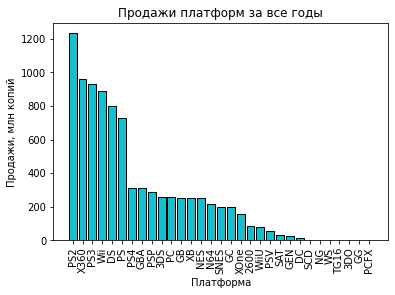

In [44]:
#посмотрим продажи плаформ за все годы по количеству млн копий
platform_sales = df.pivot_table(index='platform', values='sales', aggfunc='sum').sort_values(by = 'sales',ascending=False)
plt.bar(x = platform_sales.index,height = platform_sales['sales'],edgecolor='black',color='tab:cyan')
plt.xticks(rotation=90)
plt.title('Продажи платформ за все годы')
plt.xlabel('Платформа' )
plt.ylabel('Продажи, млн копий' )
plt.show()

Можно выделить 5 основных платформ:
- PS2
- X360
- PS3
- Wii
- DS


In [45]:
#5 наиболее прибыльных платформ
top_platforms = list(platform_sales.reset_index().head(5)['platform'])
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS']

In [46]:
#выделим 5 наиболее прибыльных платформ с 2005 г.по 2016г.
top_year = df.query('year_of_release >= 2005')

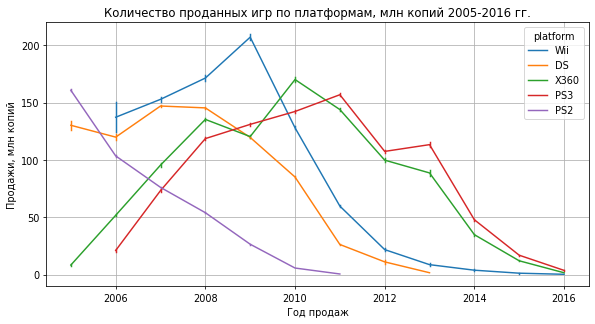

In [47]:
top_year_platforms = top_year[top_year['platform'].isin(top_platforms)] 
plt.figure(figsize = (10,5), dpi = 70)
plt.grid(True)
plt.title('Количество проданных игр по платформам, млн копий 2005-2016 гг.')
plt.xlabel('Год продаж')
plt.ylabel('Продажи, млн копий')
sns.lineplot( data = top_year_platforms, x = 'year_of_release', y = 'sales',
             hue ='platform', estimator ='sum', err_style ='bars',ci='sd')
plt.show()

In [48]:
#посмотрим количество уникальных значений с 2005 г.
top_year_platforms['platform'].value_counts()

DS      2097
PS3     1306
Wii     1286
X360    1232
PS2     1065
Name: platform, dtype: int64

In [49]:
#посмотрим количество уникальных значений с 2005 г.
top_year_platforms['year_of_release'].value_counts()

2008    1249
2009    1158
2007     988
2010     977
2011     724
2006     624
2005     396
2012     308
2013     221
2014     177
2015     112
2016      52
Name: year_of_release, dtype: int64

In [50]:
#посмотрим год рождения и "смерти" с 2005 г. и продолжительность 5 топовых платформ
def summary(x):
    result = {
        'year_mean': x['year_of_release'].mean(),
        'year_max': x['year_of_release'].max(),
        'year_min': x['year_of_release'].min(),
        'year_range': x['year_of_release'].max() - x['year_of_release'].min()
    }
    return pd.Series(result).round(0)

top_year_platforms.groupby(['platform']).apply(summary)

,year_mean,year_max,year_min,year_range
platform,,,,
DS,2008.0,2013.0,2005.0,8.0
PS2,2007.0,2011.0,2005.0,6.0
PS3,2011.0,2016.0,2006.0,10.0
Wii,2009.0,2016.0,2006.0,10.0
X360,2010.0,2016.0,2005.0,11.0




- По графику можно сделать вывод,что платформы живут 6-11 лет и выход новой платформы приводит к падению продаж игр платформы более старой версии,так,например, PS2 начал свое падение в 2007 г.,что обусловлено тем,что PS3 вышел в 2006 г. и по нему начали расти  продажи.
- Наибольшие продажи показывает DS и PS3.

### Найдем платформы,которые лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ

In [51]:
#посмотрим год рождения и "смерти" с 2005 г. и продолжительность всех платформ
def summary(x):
    result = {
        'year_mean': x['year_of_release'].mean(),
        'year_max': x['year_of_release'].max(),
        'year_min': x['year_of_release'].min(),
        'year_range': x['year_of_release'].max() - x['year_of_release'].min()
    }
    return pd.Series(result).round(0)

top_year.groupby(['platform']).apply(summary)

,year_mean,year_max,year_min,year_range
platform,,,,
3DS,2013.0,2016.0,2011.0,5.0
DC,2008.0,2008.0,2007.0,1.0
DS,2008.0,2013.0,2005.0,8.0
GBA,2005.0,2007.0,2005.0,2.0
GC,2005.0,2007.0,2005.0,2.0
PC,2010.0,2016.0,2005.0,11.0
PS2,2007.0,2011.0,2005.0,6.0
PS3,2011.0,2016.0,2006.0,10.0
PS4,2015.0,2016.0,2013.0,3.0


Возьмем данные за соответствующий актуальный период. Актуальный период определили 2013-2015 гг. Основной фактор — эти данные помогут построить прогноз на 2017 год.

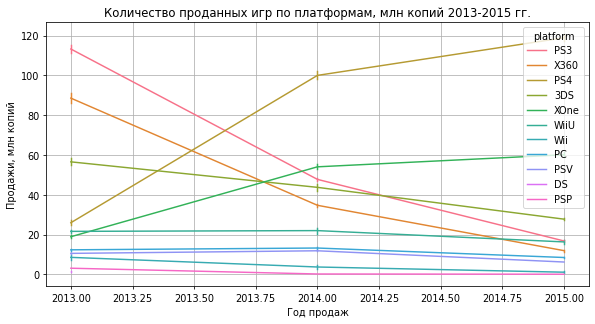

In [52]:
#выделим наиболее прибыльныe платформ с 2013 г. по 2015 г.
platform_2013_top = df.query('2016 > year_of_release >= 2013')
plt.figure(figsize = (10,5), dpi = 70)
plt.grid(True)
plt.title('Количество проданных игр по платформам, млн копий 2013-2015 гг.')
plt.xlabel('Год продаж')
plt.ylabel('Продажи, млн копий')
sns.lineplot( data = platform_2013_top, x = 'year_of_release', y = 'sales',
             hue ='platform', estimator ='sum', err_style ='bars',ci='sd')
plt.show()

In [53]:
#посмотрим количество уникальных значений
platform_2013_top['platform'].value_counts()

PS3     307
PSV     273
3DS     257
PS4     228
X360    173
XOne    160
PC      135
WiiU    101
PSP      67
Wii      22
DS        8
Name: platform, dtype: int64

In [54]:
#посмотрим количество уникальных значений
platform_2013_top['year_of_release'].value_counts()

2015    606
2014    581
2013    544
Name: year_of_release, dtype: int64

 Можно выделить 5 основных платформ:PS3,PSV,3DS,PS4,X360
- По продажам за 2013-2015 гг. лидируют PS3,PSV
- Пик продаж PS4 был в 2015 г. 
- Даже игры,которые выпустили после 2013 г. и у которых срок жизни от 5 лет в среднем,за пару лет достигают своего пика и начинают падение
- На 2017 г. у PS4 есть шанс продержаться,т.к. новая платформа


###  Постром график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [55]:
#выделим  5 топовых платформ с 2013 г.
platforms_global = (platform_2013_top.groupby('platform')['sales'].sum().sort_values(ascending=False).head().index)
platforms_global

Index(['PS4', 'PS3', 'X360', 'XOne', '3DS'], dtype='object', name='platform')

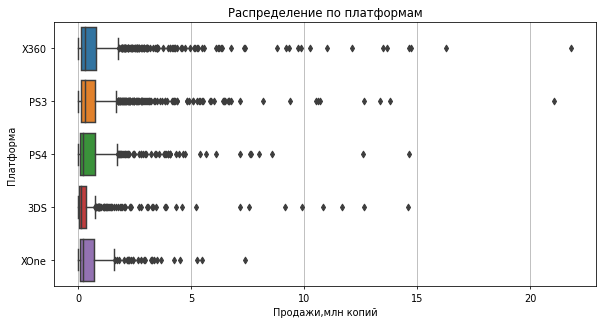

In [56]:
plt.figure(figsize = (10,5), dpi = 70)
plt.grid(True)
ax = sns.boxplot(y='platform', x='sales', data=df[df.platform.isin(platforms_global)], orient="h")
ax.set_title('Распределение по платформам')
ax.set_xlabel('Продажи,млн копий')
ax.set_ylabel('Платформа')
plt.show()

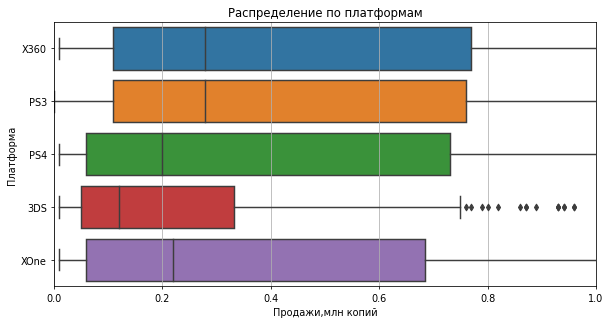

In [57]:
#выделим  5 топовых платформ с 2013 г. с продажами до 1 млн. копий
plt.figure(figsize = (10,5), dpi = 70)
plt.grid(True)
ax = sns.boxplot(y='platform', x='sales', data=df[df.platform.isin(platforms_global)], orient="h")
ax.set_title('Распределение по платформам')
ax.set_xlabel('Продажи,млн копий')
ax.set_ylabel('Платформа')
plt.xlim(0, 1)
plt.show()

In [58]:
platform_2013_top.query('sales>10').sort_values(by='sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,No_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,No_rating,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,No_rating,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24




- По графику «ящик с усами» по глобальным продажам игр в разбивке по платформам наглядно видно,что игры в основном продаются до 5 млн. копий,но есть и явные лидеры у X360 и PS3, которые были проданы в количестве более 20 млн. экземпляров.В 3 лидеров попадают:Grand Theft Auto V,Call of Duty: Modern Warfare 3,Call of Duty: Black Ops 3.По медианным продажам также лидируют X360 и PS3 

###  Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

По продажам с 2013 гг. лидируют PS3, PS4, 3DS и X360,в 2015 г. был пик продаж PS4.Возьмем за основу, как самую популярную платфору PS4

In [59]:
platform_PS4 = platform_2013_top.query('platform == "PS4"')

In [60]:
# функция, получающая на вход название признака, и возвращающая число пропущенных значений
def print_nan(column):
    return print('Пропущено {:.1%}'. format(platform_PS4[column].isna()
                                            .value_counts()[1] / len(platform_PS4), 2) + ' значений') 

In [61]:
#находим пропущенные значения в оценке критиков
print_nan('critic_score') 

Пропущено 32.5% значений


In [62]:
#находим пропущенные значения в оценке пользователей
print_nan('user_score')

Пропущено 31.6% значений


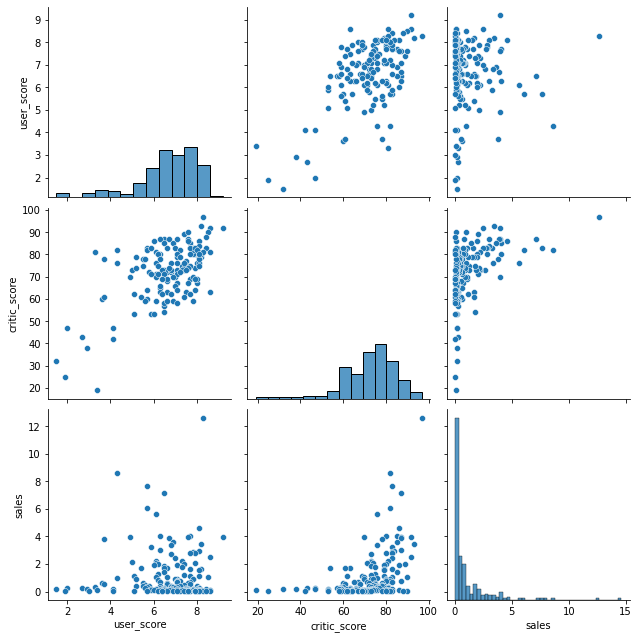

In [63]:
_ = sns.pairplot(platform_PS4, vars=['user_score', 'critic_score', 'sales'],height=3) 

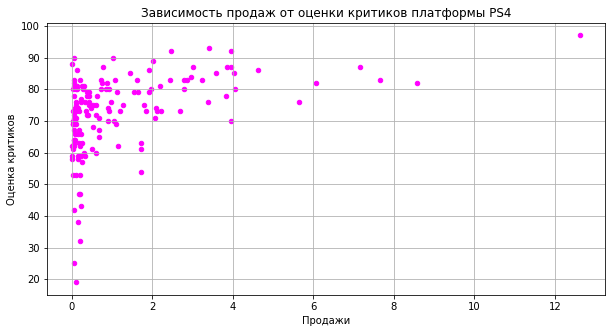

Коэффициент корреляции 0.43 между продажами и оценкой критиков платформы PS4


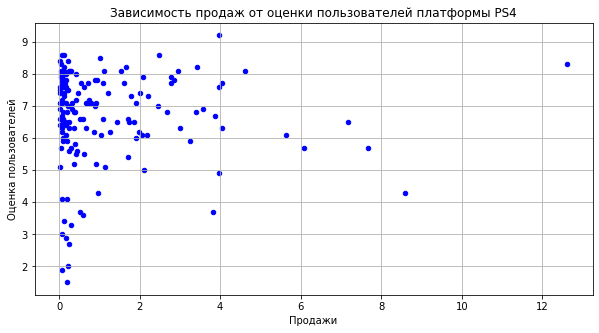

Коэффициент корреляции 0.024 между продажами и оценкой пользователей платформы PS4


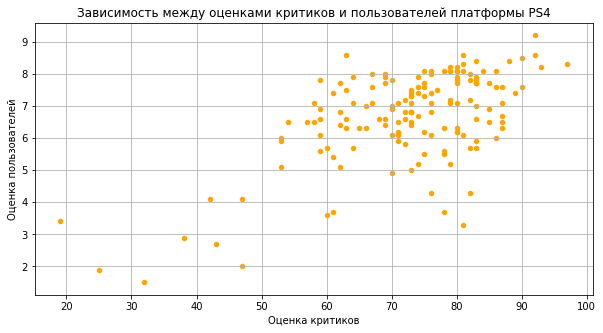

Коэффициент корреляции 0.61 между оценками критиков и пользователей платформы PS4


In [64]:
#посмотрим, как влияют на продажи внутри PS4 отзывы пользователей и критиков
#построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами
ax1 = platform_PS4.plot(x='sales', y='critic_score', kind='scatter',color='magenta',grid=True,figsize=(10, 5))
ax1.set_title(f'Зависимость продаж от оценки критиков платформы PS4')
ax1.set_xlabel('Продажи')
ax1.set_ylabel('Оценка критиков')
plt.show()
print('Коэффициент корреляции {:.2}'. format(platform_PS4['sales'].
                                             corr(platform_PS4['critic_score']), )
      + f' между продажами и оценкой критиков платформы PS4') 
ax2 = platform_PS4.plot(x='sales', y='user_score', kind='scatter',color='blue',grid=True,figsize=(10, 5))
ax2.set_title(f'Зависимость продаж от оценки пользователeй платформы PS4')
ax2.set_xlabel('Продажи')
ax2.set_ylabel('Оценка пользователей')
plt.show()
print('Коэффициент корреляции {:.2}'. format(platform_PS4['sales'].
                                             corr(platform_PS4['user_score']), ) 
      + f' между продажами и оценкой пользователей платформы PS4')
ax3 = platform_PS4.plot(x='critic_score', y='user_score', kind='scatter',color='orange',grid=True,figsize=(10, 5))
ax3.set_title(f'Зависимость между оценками критиков и пользователeй платформы PS4')
ax3.set_xlabel('Оценка критиков')
ax3.set_ylabel('Оценка пользователей')
plt.show()
print('Коэффициент корреляции {:.2}'. format(platform_PS4['critic_score'].
                                             corr(platform_PS4['user_score']), ) 
      + f' между оценками критиков и пользователей платформы PS4') 




- Коэффициент корреляции 0.43 между продажами и оценкой критиков платформы PS4 и является **слабой положительной корреляцией**
- Коэффициент корреляции 0.024 между продажами и оценкой пользователей платформы PS4 и является **остутствием корреляции**
- Коэффициент корреляции 0.61 между оценками критиков и  пользователей платформы PS4 и является **средней положительной корреляцией**

### Соотнесем выводы продаж PS4 с продажами игр на других платформах

Сравним продажи PS4 с другми платформами,такими как X360,PS3,3DS

In [65]:
platform_X360 = platform_2013_top.query('platform == "X360"')

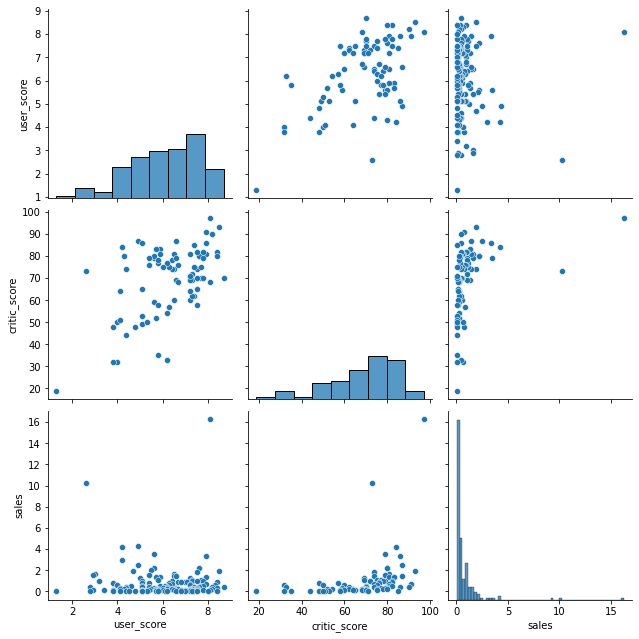

In [66]:
_ = sns.pairplot(platform_X360, vars=['user_score', 'critic_score', 'sales'],height=3) 

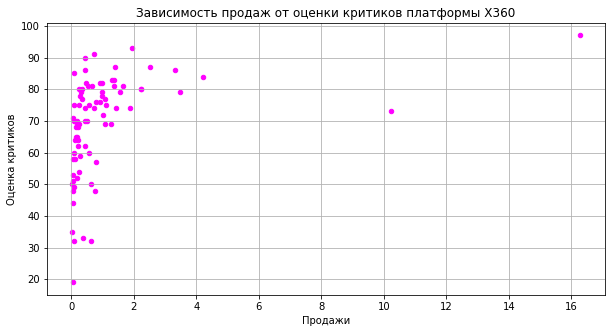

Коэффициент корреляции 0.35 между продажами и оценкой критиков платформы X360


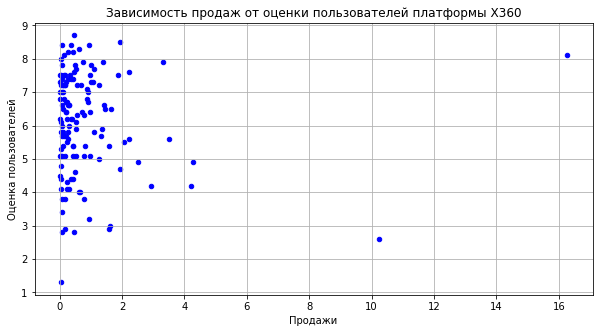

Коэффициент корреляции -0.035 между продажами и оценкой пользователей платформы X360


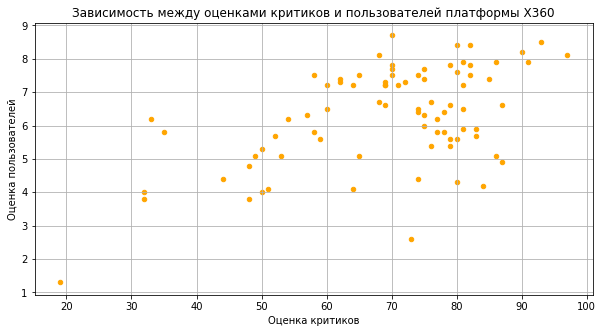

Коэффициент корреляции 0.52 между оценками критиков и пользователей платформы X360


In [67]:
#посмотрим, как влияют на продажи внутри X360 отзывы пользователей и критиков
#построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами
ax1 = platform_X360.plot(x='sales', y='critic_score', kind='scatter',color='magenta',grid=True,figsize=(10, 5))
ax1.set_title(f'Зависимость продаж от оценки критиков платформы X360')
ax1.set_xlabel('Продажи')
ax1.set_ylabel('Оценка критиков')
plt.show()
print('Коэффициент корреляции {:.2}'. format(platform_X360['sales'].
                                             corr(platform_X360['critic_score']), )
      + f' между продажами и оценкой критиков платформы X360') 
ax2 = platform_X360.plot(x='sales', y='user_score', kind='scatter',color='blue',grid=True,figsize=(10, 5))
ax2.set_title(f'Зависимость продаж от оценки пользователeй платформы X360')
ax2.set_xlabel('Продажи')
ax2.set_ylabel('Оценка пользователей')
plt.show()
print('Коэффициент корреляции {:.2}'. format(platform_X360['sales'].
                                             corr(platform_X360['user_score']), ) 
      + f' между продажами и оценкой пользователей платформы X360')
ax3 = platform_X360.plot(x='critic_score', y='user_score', kind='scatter',color='orange',grid=True,figsize=(10, 5))
ax3.set_title(f'Зависимость между оценками критиков и пользователeй платформы X360')
ax3.set_xlabel('Оценка критиков')
ax3.set_ylabel('Оценка пользователей')
plt.show()
print('Коэффициент корреляции {:.2}'. format(platform_X360['critic_score'].
                                             corr(platform_X360['user_score']), ) 
      + f' между оценками критиков и пользователей платформы X360') 




- Коэффициент корреляции 0.35 между продажами и оценкой критиков платформы X360 и является **слабой положительной корреляцией**
- Коэффициент корреляции -0.035 между продажами и оценкой пользователей платформы X360 и является **остутствием корреляции**
- Коэффициент корреляции 0.52 между оценками критиков и пользователей платформы X360 и является **средней положительной корреляцией**

In [68]:
platform_PS3 = platform_2013_top.query('platform == "PS3"')

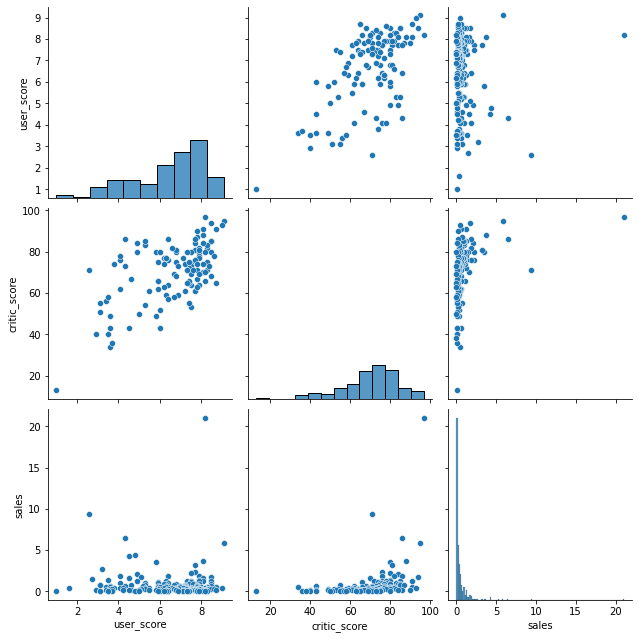

In [69]:
_ = sns.pairplot(platform_PS3, vars=['user_score', 'critic_score', 'sales'],height=3) 

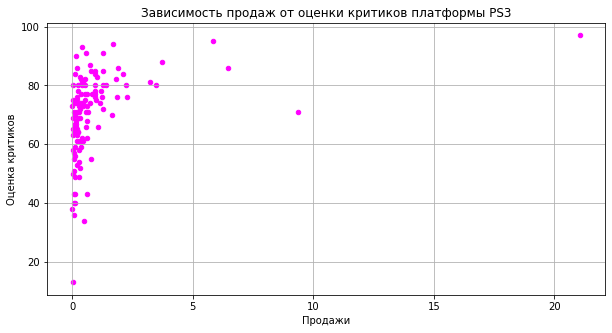

Коэффициент корреляции 0.33 между продажами и оценкой критиков платформы PS3


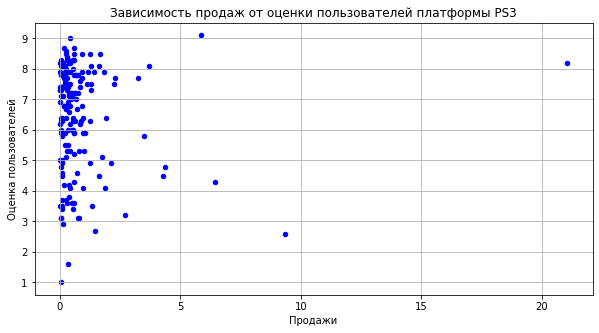

Коэффициент корреляции -0.016 между продажами и оценкой пользователей платформы PS3


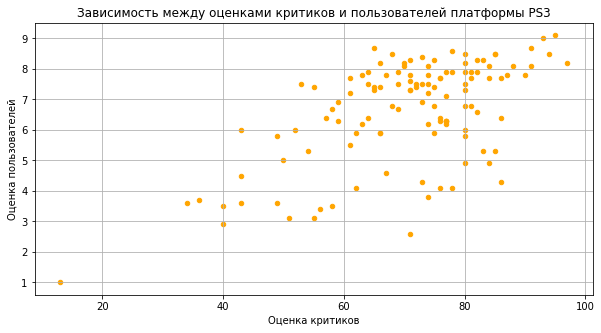

Коэффициент корреляции 0.6 между оценками критиков и пользователей платформы PS3


In [70]:
#посмотрим, как влияют на продажи внутри PS3 отзывы пользователей и критиков
#построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами
ax1 = platform_PS3.plot(x='sales', y='critic_score', kind='scatter',color='magenta',grid=True,figsize=(10, 5))
ax1.set_title(f'Зависимость продаж от оценки критиков платформы PS3')
ax1.set_xlabel('Продажи')
ax1.set_ylabel('Оценка критиков')
plt.show()
print('Коэффициент корреляции {:.2}'. format(platform_PS3['sales'].
                                             corr(platform_PS3['critic_score']), )
      + f' между продажами и оценкой критиков платформы PS3') 
ax2 = platform_PS3.plot(x='sales', y='user_score', kind='scatter',color='blue',grid=True,figsize=(10, 5))
ax2.set_title(f'Зависимость продаж от оценки пользователeй платформы PS3')
ax2.set_xlabel('Продажи')
ax2.set_ylabel('Оценка пользователей')
plt.show()
print('Коэффициент корреляции {:.2}'. format(platform_PS3['sales'].
                                             corr(platform_PS3['user_score']), ) 
      + f' между продажами и оценкой пользователей платформы PS3')
ax3 = platform_PS3.plot(x='critic_score', y='user_score', kind='scatter',color='orange',grid=True,figsize=(10, 5))
ax3.set_title(f'Зависимость между оценками критиков и пользователeй платформы PS3')
ax3.set_xlabel('Оценка критиков')
ax3.set_ylabel('Оценка пользователей')
plt.show()
print('Коэффициент корреляции {:.2}'. format(platform_PS3['critic_score'].
                                             corr(platform_PS3['user_score']), ) 
      + f' между оценками критиков и пользователей платформы PS3') 



- Коэффициент корреляции 0.33 между продажами и оценкой критиков платформы PS3 и является **слабой положительной корреляцией**
- Коэффициент корреляции -0.016 между продажами и оценкой пользователей платформы PS3 и является **остутствием корреляции**
- Коэффициент корреляции 0.6 между оценками критиков и пользователей платформы PS3 и является **средней положительной корреляцией**

In [71]:
platform_3DS = platform_2013_top.query('platform == "3DS"')

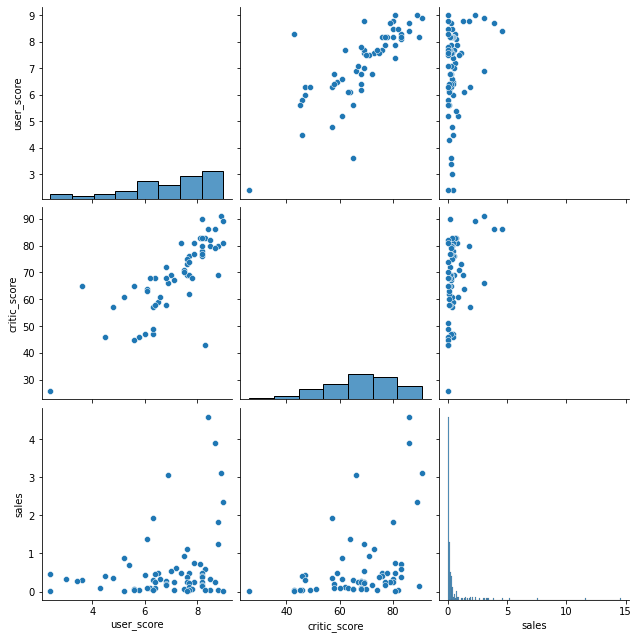

In [72]:
_ = sns.pairplot(platform_3DS, vars=['user_score', 'critic_score', 'sales'],height=3) 

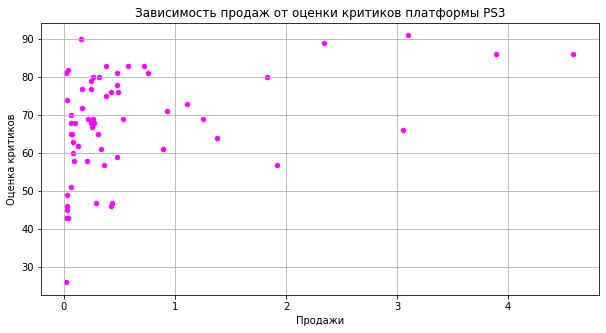

Коэффициент корреляции 0.38 между продажами и оценкой критиков платформы 3DS


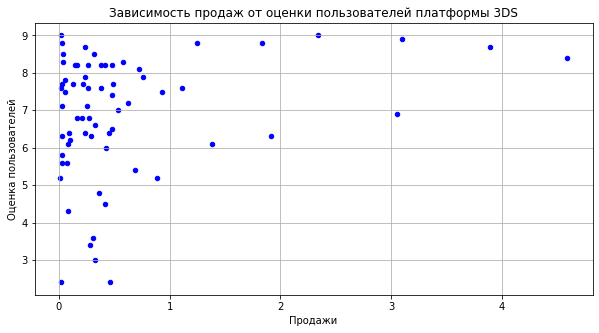

Коэффициент корреляции 0.26 между продажами и оценкой пользователей платформы 3DS


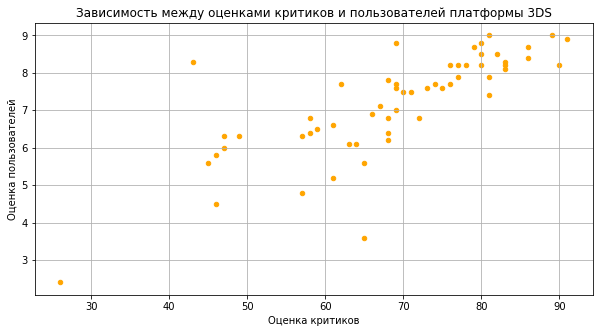

Коэффициент корреляции 0.78 между оценками критиков и пользователей платформы 3DS


In [73]:
#посмотрим, как влияют на продажи внутри 3DS отзывы пользователей и критиков
#построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами
ax1 = platform_3DS.plot(x='sales', y='critic_score', kind='scatter',color='magenta',grid=True,figsize=(10, 5))
ax1.set_title(f'Зависимость продаж от оценки критиков платформы PS3')
ax1.set_xlabel('Продажи')
ax1.set_ylabel('Оценка критиков')
plt.show()
print('Коэффициент корреляции {:.2}'. format(platform_3DS['sales'].
                                             corr(platform_3DS['critic_score']), )
      + f' между продажами и оценкой критиков платформы 3DS') 
ax2 = platform_3DS.plot(x='sales', y='user_score', kind='scatter',color='blue',grid=True,figsize=(10, 5))
ax2.set_title(f'Зависимость продаж от оценки пользователeй платформы 3DS')
ax2.set_xlabel('Продажи')
ax2.set_ylabel('Оценка пользователей')
plt.show()
print('Коэффициент корреляции {:.2}'. format(platform_3DS['sales'].
                                             corr(platform_3DS['user_score']), ) 
      + f' между продажами и оценкой пользователей платформы 3DS')
ax3 = platform_3DS.plot(x='critic_score', y='user_score', kind='scatter',color='orange',grid=True,figsize=(10, 5))
ax3.set_title(f'Зависимость между оценками критиков и пользователeй платформы 3DS')
ax3.set_xlabel('Оценка критиков')
ax3.set_ylabel('Оценка пользователей')
plt.show()
print('Коэффициент корреляции {:.2}'. format(platform_3DS['critic_score'].
                                             corr(platform_3DS['user_score']), ) 
      + f' между оценками критиков и пользователей платформы 3DS') 



- Коэффициент корреляции 0.38 между продажами и оценкой критиков платформы 3DS и является **слабой положительной корреляцией**
- Коэффициент корреляции 0.26 между продажами и оценкой пользователей платформы 3DS и является **слабой положительной корреляцией**
- Коэффициент корреляции 0.78 между оценками критиков и пользователей платформы 3DS и является **высокой положительной корреляцией**

**Вывод:**

- Нет разницы между продажами PS4 с продажами игр на других платформах,во всех случаях слабая положительная корреляция
- Корреляция по продажами PS4 и продажам игр на других платформах больше по оценке критиков, чем по оценке пользователей
- Корреляция по оценкам критиков и пользователй PS4 и оценкам игр на других платформах положительная, что свидетельствует о том, что либо пользователи покупают игры после оценок критиков, либо критики приступают к оценке игр после спроса на игры от пользователей 

###  Посмотрим на общее распределение игр по жанрам. Расскажем о самых прибыльных жанрах. Выделим жанры с высокими и низкими продажами.

In [74]:
#посмотрим количество уникальных значений с 2013г. по 2015г.
platform_2013_top['genre'].value_counts()

Action          588
Role-Playing    238
Adventure       189
Sports          166
Shooter         140
Misc            123
Fighting         64
Racing           61
Platform         59
Simulation       44
Strategy         43
Puzzle           16
Name: genre, dtype: int64

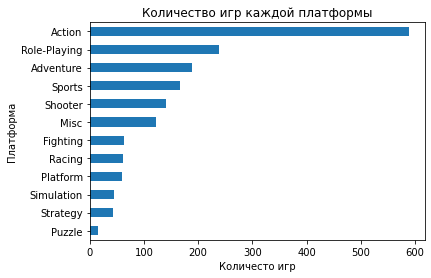

In [75]:
# посмотрим на распределение значений с 2013г. по 2015г.
platform_2013_top.genre.value_counts().sort_values().plot(kind='barh')
plt.title('Количество игр каждой платформы')
plt.xlabel('Количесто игр')
plt.ylabel('Платформа')
plt.show()

In [76]:
#посчитаем сумму, среднее количество, дисперсию и стандартное отклонение по суммарным продажам по всем жанрам
platform_2013_top.groupby('genre').agg({'sales':['sum','median','mean','var','std']}).style.format("{:.2f}")

In [77]:
# средние продажи игр разных жанров на разных платформах. 
(platform_2013_top.pivot_table(index='genre',columns=['platform'],values='sales',aggfunc='mean')
 .style.format("{:.2f}").background_gradient(cmap='Reds', axis=0))

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
genre,,,,,,,,,,,
Action,0.31,0.25,0.16,0.69,0.96,0.07,0.09,0.35,0.31,0.80,0.63
Adventure,0.13,0.03,0.05,0.15,0.30,0.02,0.05,0.18,0.08,0.17,0.23
Fighting,1.36,nan,0.05,0.27,0.54,0.02,0.13,nan,1.69,0.36,0.42
Misc,0.24,0.08,0.18,0.68,0.76,0.02,0.23,1.15,0.41,1.56,0.49
Platform,0.65,0.35,0.01,0.40,0.79,nan,0.08,1.12,1.23,0.41,0.33
Puzzle,0.19,nan,nan,0.04,0.02,nan,0.05,nan,0.33,nan,nan
Racing,nan,nan,0.09,0.50,1.10,nan,0.03,nan,3.68,0.26,0.76
Role-Playing,1.07,nan,0.32,0.36,0.70,0.15,0.14,nan,0.38,0.55,0.92
Shooter,0.06,nan,0.34,1.06,3.07,nan,0.72,nan,0.73,1.07,2.11




- Самый популярные игры по количеству выпущенных игр: Shooter, Action, Sports
- Антирейтинг выпущенных игр:Puzzle,Strategy
- Самые покупаемые игры:Sports,Shooter
- Реже всего покупают:Puzzle,Adventure
- Shooter, самый выпускаемый и продаваемый жанр
- PS всех поколений специализируется на Shooter

**Вывод:**

- До 1995 г. продавалось совсем мало игр, к 2005 г. пошел рост покупок,а к 2008-2009 гг.,но с 2011 г. резкое снижение, что может быть обусловлено тем,что игры стали дорогими.Тогда же начали стремительно расти мобильные игры. Рынок стал перестраиваться на онлайновые рельсы. Многие разработчики, которым сложно было потянуть крупный онлайн-проект, уходили в новую нишу – браузерные игры, которые со временем потихоньку перетекли в мобильные игры и так далее.
- Платформы живут 6-11 лет и выход новой платформы приводит к падению продаж игр платформы более старой версии
- Наибольшие продажи показывает 3DS и PS3.
- По продажам за 2013-2015 гг. лидировали PS3,PS4,X360,пик продаж PS4 был в 2015 г.
- На 2017 г.у PS4 есть шанс продержаться,т.к. новая платформа
- Игры в основном продаются до 5 млн. копий,но есть и явные лидеры у X360 и PS3, которые были проданы в количестве более 20 млн. экземпляров.В 3 лидеров попали:Grand Theft Auto V,Call of Duty: Modern Warfare 3,Call of Duty: Black Ops 3.

## Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишем различия в долях продаж.
- Самые популярные жанры (топ-5). Поясним разницу.
- Влияение  рейтинга ESRB на продажи в отдельном регионе.

**Продажи по регионам**
- na_sales — продажи в Северной Америке (миллионы проданных копий)
- eu_sales — продажи в Европе (миллионы проданных копий)
- jp_sales — продажи в Японии (миллионы проданных копий)
- other_sales — продажи в других странах (миллионы проданных копий)
- sales — общие продажи (миллионы проданных копий)


### Самые популярные платформы (топ-5)

In [78]:
# посмотрим распределение между платформой и регионом в % соотношении от общего объема
display(platform_2013_top.pivot_table(index=['platform'],values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],aggfunc=lambda x: x.sum())
 .apply(lambda col: col / col.sum(), axis=0).style.format("{:.1%}").background_gradient(cmap='Reds', axis=0)
 .set_caption("Распределение продаж по типам платформ в % от всех продаж"))

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
3DS,8.4%,49.2%,8.7%,5.3%
DS,0.2%,0.0%,0.1%,0.1%
PC,6.4%,0.0%,2.5%,2.5%
PS3,19.5%,18.2%,16.0%,25.0%
PS4,32.1%,8.4%,22.2%,36.1%
PSP,0.0%,2.7%,0.0%,0.0%
PSV,1.7%,12.4%,1.2%,2.9%
Wii,1.7%,0.0%,1.7%,1.1%
WiiU,5.4%,8.4%,6.9%,4.1%


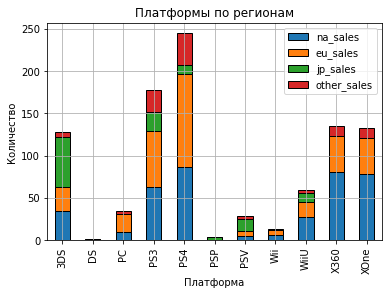

In [79]:
# посчитаем количество платформ по регионам
platform_2013_top.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].agg('sum')\
.plot(kind='bar',stacked=True,grid=True,edgecolor='black')
plt.title('Платформы по регионам')
plt.xlabel('Платформа')
plt.ylabel('Количество')
plt.show()



- 3DS,PSV популярны в Японии
- X360 и XOne популярны в Северной Америке
- PS3 и PS4 популярны в Европе и других странах


In [80]:
# посмотрим распределение между платформой и регионом в % соотношении от общего объема
display(platform_2013_top.pivot_table(index=['platform'],values=['na_sales'],aggfunc=lambda x: x.sum())
 .apply(lambda col: col / col.sum(), axis=0).style.format("{:.1%}").background_gradient(cmap='Reds', axis=0)
 .set_caption("Распределение продаж по типам платформ в % от всех продаж в Северной Америке"))

,na_sales
platform,
3DS,8.7%
DS,0.1%
PC,2.5%
PS3,16.0%
PS4,22.2%
PSP,0.0%
PSV,1.2%
Wii,1.7%
WiiU,6.9%


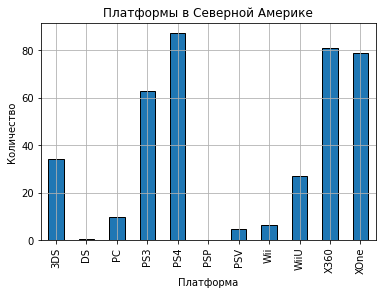

In [81]:
# посчитаем количество платформ в Северной Америке
platform_2013_top.groupby('platform')['na_sales'].agg('sum')\
.plot(kind='bar',stacked=True,grid=True,edgecolor='black')
plt.title('Платформы в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Количество')
plt.show()

В Северной Америке лидер PS4

In [82]:
# посмотрим распределение между платформой и регионом в % соотношении от общего объема
display(platform_2013_top.pivot_table(index=['platform'],values=['eu_sales'],aggfunc=lambda x: x.sum())
 .apply(lambda col: col / col.sum(), axis=0).style.format("{:.1%}").background_gradient(cmap='Reds', axis=0)
 .set_caption("Распределение продаж по типам платформ в % от всех продаж в Европе"))

,eu_sales
platform,
3DS,8.4%
DS,0.2%
PC,6.4%
PS3,19.5%
PS4,32.1%
PSP,0.0%
PSV,1.7%
Wii,1.7%
WiiU,5.4%


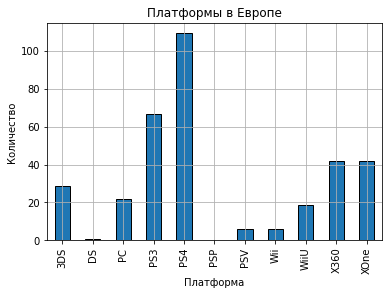

In [83]:
# посчитаем количество платформ в Европе
platform_2013_top.groupby('platform')['eu_sales'].agg('sum')\
.plot(kind='bar',stacked=True,grid=True,edgecolor='black')
plt.title('Платформы в Европе')
plt.xlabel('Платформа')
plt.ylabel('Количество')
plt.show()

В Европе лидирует PS4

In [84]:
# посмотрим распределение между платформой и регионом в % соотношении от общего объема
display(platform_2013_top.pivot_table(index=['platform'],values=['jp_sales'],aggfunc=lambda x: x.sum())
 .apply(lambda col: col / col.sum(), axis=0).style.format("{:.1%}").background_gradient(cmap='Reds', axis=0)
 .set_caption("Распределение продаж по типам платформ в % от всех продаж в Японии"))

,jp_sales
platform,
3DS,49.2%
DS,0.0%
PC,0.0%
PS3,18.2%
PS4,8.4%
PSP,2.7%
PSV,12.4%
Wii,0.0%
WiiU,8.4%


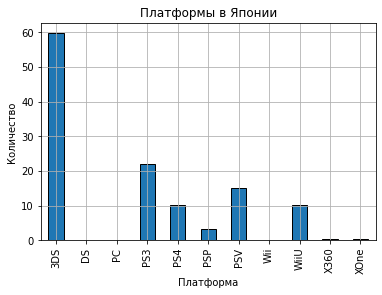

In [85]:
# посчитаем количество платформ в Японии
platform_2013_top.groupby('platform')['jp_sales'].agg('sum')\
.plot(kind='bar',stacked=True,grid=True,edgecolor='black')
plt.title('Платформы в Японии')
plt.xlabel('Платформа')
plt.ylabel('Количество')
plt.show()

В Японии лидер 3DS 

In [86]:
# посмотрим распределение между платформой и регионом в % соотношении от общего объема
display(platform_2013_top.pivot_table(index=['platform'],values=['other_sales'],aggfunc=lambda x: x.sum())
 .apply(lambda col: col / col.sum(), axis=0).style.format("{:.1%}").background_gradient(cmap='Reds', axis=0)
 .set_caption("Распределение продаж по типам платформ в % от всех продаж в других регионах"))

,other_sales
platform,
3DS,5.3%
DS,0.1%
PC,2.5%
PS3,25.0%
PS4,36.1%
PSP,0.0%
PSV,2.9%
Wii,1.1%
WiiU,4.1%


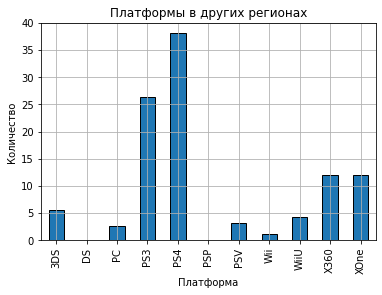

In [87]:
# посчитаем количество платформ в других регионах
platform_2013_top.groupby('platform')['other_sales'].agg('sum')\
.plot(kind='bar',stacked=True,grid=True,edgecolor='black')
plt.title('Платформы в других регионах')
plt.xlabel('Платформа')
plt.ylabel('Количество')
plt.show()

В других регионах лидирует PS4

**Вывод:**

**Северная Америка**


- PS4 занимает певое место с 22,2 %
- X360 занимает второе место с 20,6 % от всех продаж, что не удивительно,т.к. вторая по счёту игровая приставка компании Microsoft и была запущена в 2005 г. в США.Все доступные на время выпуска приставки были успешно проданы в каждой стране, кроме Японии
- За ним следует XOne 20,1 %
- 4 место  PS3  16 %
- замыкает топ 5 3DS с 8,7 %
   
   
**Европа**

- PS4 занимает 32,1 % от всех продаж и первое место
- PS3 занимает 19,5 % от всех продаж и второе место
- XOne и X360 делят третье метсто и  по 12,3 %
- замыкает топ 5 3DS с 8,4 %

**Япония**

- Первое место занимает портативная игровая система производства Nintendo, которая выпускается в Японии 3DS и 49,2 %
- PS3 занимает 18,2 % от всех продаж и второе место
- PSV занимает третье место с 12,4 %
- Четвертое место делят WiiU и PS4с 8,4 %



- Лидером по покупке игр PS4 является Северная Америка, Европа и другие регионы
- Лидером по покупке игр 3DS является Япония

### Самые популярные жанры (топ-5) 

In [88]:
# посмотрим распределение между жанрам и регионом в % соотношении от общего объема
display(platform_2013_top.pivot_table(index=['genre'],values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],aggfunc=lambda x: x.sum())
 .apply(lambda col: col / col.sum(), axis=0).style.format("{:.1%}").background_gradient(cmap='Reds', axis=0)
 .set_caption("Распределение продаж по жанрам в % от всех продаж"))

,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
Action,31.5%,27.5%,29.7%,32.4%
Adventure,2.0%,3.8%,1.6%,2.0%
Fighting,2.1%,5.7%,3.5%,2.9%
Misc,5.7%,6.7%,6.8%,5.6%
Platform,4.2%,3.9%,4.3%,3.5%
Puzzle,0.3%,1.0%,0.2%,0.2%
Racing,5.4%,1.9%,3.1%,3.9%
Role-Playing,9.6%,36.6%,10.3%,9.6%
Shooter,21.1%,4.6%,23.8%,22.5%


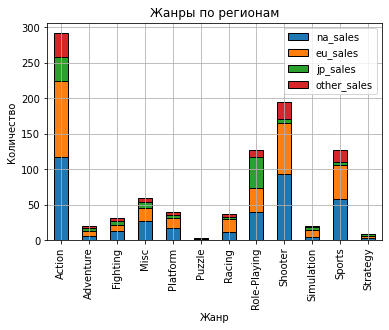

In [89]:
# посчитаем количество жанров по регионам
platform_2013_top.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].agg('sum')\
.plot(kind='bar',stacked=True,grid=True,edgecolor='black')
plt.title('Жанры по регионам')
plt.xlabel('Жанр')
plt.ylabel('Количество')
plt.show()


- Action самый популярный
- Role-Playing лидирует в Японии
- Shooter и Sports предпочитают в Европе, Северной Америке и других странах
- Misc замыкает выбор жанра по всем регионам	

In [90]:
#посмотрим пропуски
platform_2013_top['genre'].isna().sum()

0

In [91]:
# посмотрим распределение между жанрам и регионом в % соотношении от общего объема
display(platform_2013_top.pivot_table(index=['genre'],values=['na_sales'],aggfunc=lambda x: x.sum())
 .apply(lambda col: col / col.sum(), axis=0).style.format("{:.1%}").background_gradient(cmap='Reds', axis=0)
 .set_caption("Распределение продаж по жанрам в % от всех продаж в Северной Америке"))

,na_sales
genre,
Action,29.7%
Adventure,1.6%
Fighting,3.5%
Misc,6.8%
Platform,4.3%
Puzzle,0.2%
Racing,3.1%
Role-Playing,10.3%
Shooter,23.8%


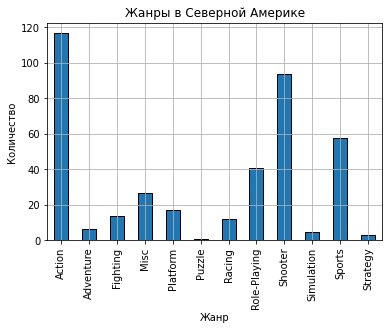

In [92]:
# жанры в Северной Америке
platform_2013_top.groupby('genre')['na_sales'].agg('sum')\
.plot(kind='bar',stacked=True,grid=True,edgecolor='black')
plt.title('Жанры в Северной Америке')
plt.xlabel('Жанр')
plt.ylabel('Количество')
plt.show()

Action самый популярный в Северной Америке

In [93]:
# посмотрим распределение между жанрам и регионом в % соотношении от общего объема
display(platform_2013_top.pivot_table(index=['genre'],values=['eu_sales'],aggfunc=lambda x: x.sum())
 .apply(lambda col: col / col.sum(), axis=0).style.format("{:.1%}").background_gradient(cmap='Reds', axis=0)
 .set_caption("Распределение продаж по жанрам в % от всех продаж в Европе"))

,eu_sales
genre,
Action,31.5%
Adventure,2.0%
Fighting,2.1%
Misc,5.7%
Platform,4.2%
Puzzle,0.3%
Racing,5.4%
Role-Playing,9.6%
Shooter,21.1%


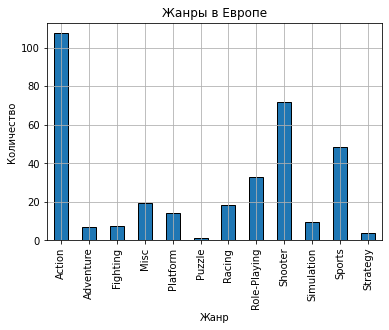

In [94]:
# жанры в Европе
platform_2013_top.groupby('genre')['eu_sales'].agg('sum')\
.plot(kind='bar',stacked=True,grid=True,edgecolor='black')
plt.title('Жанры в Европе')
plt.xlabel('Жанр')
plt.ylabel('Количество')
plt.show()

Action самый популярный в Европе

In [95]:
# посмотрим распределение между жанрам и регионом в % соотношении от общего объема
display(platform_2013_top.pivot_table(index=['genre'],values=[ 'jp_sales'],aggfunc=lambda x: x.sum())
 .apply(lambda col: col / col.sum(), axis=0).style.format("{:.1%}").background_gradient(cmap='Reds', axis=0)
 .set_caption("Распределение продаж по жанрам в % от всех продаж в Японии"))

,jp_sales
genre,
Action,27.5%
Adventure,3.8%
Fighting,5.7%
Misc,6.7%
Platform,3.9%
Puzzle,1.0%
Racing,1.9%
Role-Playing,36.6%
Shooter,4.6%


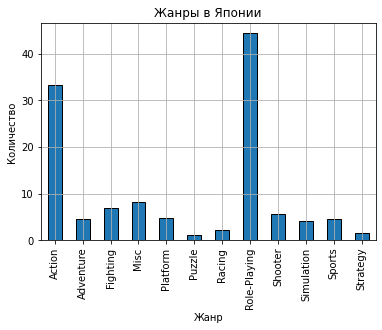

In [96]:
# жанры в Японии
platform_2013_top.groupby('genre')['jp_sales'].agg('sum')\
.plot(kind='bar',stacked=True,grid=True,edgecolor='black')
plt.title('Жанры в Японии')
plt.xlabel('Жанр')
plt.ylabel('Количество')
plt.show()

Role-Playing самый популярный в Японии

In [97]:
# посмотрим распределение между жанрам и регионом в % соотношении от общего объема
display(platform_2013_top.pivot_table(index=['genre'],values=['other_sales'],aggfunc=lambda x: x.sum())
 .apply(lambda col: col / col.sum(), axis=0).style.format("{:.1%}").background_gradient(cmap='Reds', axis=0)
 .set_caption("Распределение продаж по жанрам в % от всех продаж в других регионах"))

,other_sales
genre,
Action,32.4%
Adventure,2.0%
Fighting,2.9%
Misc,5.6%
Platform,3.5%
Puzzle,0.2%
Racing,3.9%
Role-Playing,9.6%
Shooter,22.5%


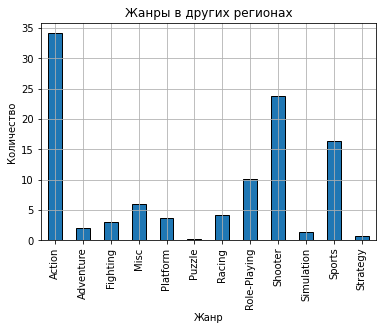

In [98]:
# жанры в других регионах
platform_2013_top.groupby('genre')['other_sales'].agg('sum')\
.plot(kind='bar',stacked=True,grid=True,edgecolor='black')
plt.title('Жанры в других регионах')
plt.xlabel('Жанр')
plt.ylabel('Количество')
plt.show()

В других регионах лидирует Action

**Вывод:**


**Северная Америка**

- Action на первом месте с 29,7 %
- Shooter занимает второе место 23,8 % 
- Sports  14,7 %  третье место
- Role-Playing с 10,3 % на четвертом месте
- Замыкает топ 5 Miscс 6,8 %


**Европа**

- Action на первом месте с 31,5 %
- Shooter занимает второе место 21,1 % 
- Sports  14,2 %  третье место
- Role-Playing с 9,6 % на четвертом месте
- Замыкает топ 5 Miscс 5,7 %

**Япония**

- Самый популярный  Role-Playing с 36,6 %
- Action с 27,5 % на 2 месте
- Misc  с 6,7 % на третьем месте
- Fighting с 5,7 % на 4 месте
- Замыкает топ 5 Shooter с 4,6 %  




- Лидером по покупке жанров Action ,Shooter и Sports   является Северная Америка
- Лидером по покупке жанров Action является Европа
- В Японии самый любимый жанр Role-Playing

### Влияние рейтинга ESRB на продажи в отдельном регионе

In [99]:
# посмотрим влияние рейтингп на регионы в % соотношении от общего объема
display(platform_2013_top.pivot_table(index=['rating'],values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],aggfunc=lambda x: x.sum())
 .apply(lambda col: col / col.sum(), axis=0).style.format("{:.1%}").background_gradient(cmap='Reds', axis=0)
 .set_caption("Влияение рейтинга на продажи"))

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
E,20.5%,11.6%,18.1%,18.5%
E10+,11.4%,4.5%,12.8%,10.9%
M,37.8%,10.6%,38.1%,39.9%
No_rating,20.9%,58.2%,20.6%,20.1%
T,9.4%,15.1%,10.4%,10.6%


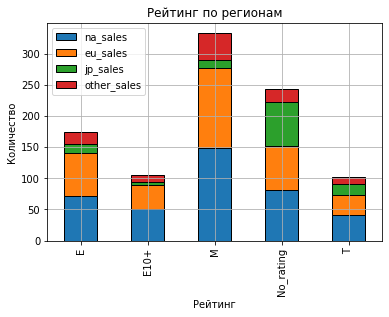

In [100]:
# посчитаем рейтинг по регионам
platform_2013_top.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].agg('sum')\
.plot(kind='bar',stacked=True,grid=True,edgecolor='black')
plt.title('Рейтинг по регионам')
plt.xlabel('Рейтинг')
plt.ylabel('Количество')
plt.show()

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. ESRB была основана в 1994 году.

- «E» («Everyone») — «Для всех»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «EC» («Early childhood») — «Для детей младшего возраста»
- «K-A»: Для детей – для тех, кто уже научился говорить и держать джойстик, эти игры уже могут вызывать интерес [позже в 1998 году был переименован в Е – для всех возрастов, а также чуть позже был добавлен рейтинг Е10+, как промежуточный между Е и Т]
- «RP» ( «Rating Pending»») — «Рейтинг ожидается»
- «AO» («Adults Only 18+») — «Только для взрослых»


Чаще всего покупают игры с рейтингом «M» («Mature») — «Для взрослых» , за ним следует «E» («Everyone») — «Для всех» для Северной Америки и Европы,в Японии рейтинг ESRB на в 58,2 % не оценивает игры

In [101]:
# посмотрим влияние рейтингп на регионы в % соотношении от общего объема
display(platform_2013_top.pivot_table(index=['rating'],values=['na_sales'],aggfunc=lambda x: x.sum())
 .apply(lambda col: col / col.sum(), axis=0).style.format("{:.1%}").background_gradient(cmap='Reds', axis=0)
 .set_caption("Влияение рейтинга на продажи в Северной Америке"))

,na_sales
rating,
E,18.1%
E10+,12.8%
M,38.1%
No_rating,20.6%
T,10.4%


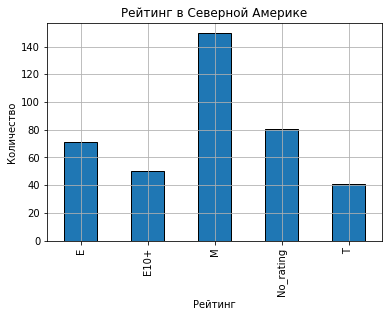

In [102]:
# посчитаем рейтинг в Северной Америке
platform_2013_top.groupby('rating')['na_sales'].agg('sum')\
.plot(kind='bar',stacked=True,grid=True,edgecolor='black')
plt.title('Рейтинг в Северной Америке')
plt.xlabel('Рейтинг')
plt.ylabel('Количество')
plt.show()

 В Северной Америке на первом месте игры с рейтингом «M» («Mature») — «Для взрослых» 

In [103]:
# посмотрим влияние рейтинга на регионы в % соотношении от общего объема
display(platform_2013_top.pivot_table(index=['rating'],values=['eu_sales'],aggfunc=lambda x: x.sum())
 .apply(lambda col: col / col.sum(), axis=0).style.format("{:.1%}").background_gradient(cmap='Reds', axis=0)
 .set_caption("Влияние рейтинга на продажи в Европе"))

,eu_sales
rating,
E,20.5%
E10+,11.4%
M,37.8%
No_rating,20.9%
T,9.4%


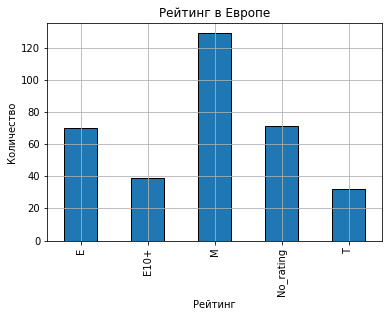

In [104]:
# посчитаем рейтинг в Европе
platform_2013_top.groupby('rating')['eu_sales'].agg('sum')\
.plot(kind='bar',stacked=True,grid=True,edgecolor='black')
plt.title('Рейтинг в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Количество')
plt.show()

 В Европе на первом месте игры с рейтингом «M» («Mature») — «Для взрослых» 

In [105]:
# посмотрим влияние рейтинга на регионы в % соотношении от общего объема
display(platform_2013_top.pivot_table(index=['rating'],values=['jp_sales'],aggfunc=lambda x: x.sum())
 .apply(lambda col: col / col.sum(), axis=0).style.format("{:.1%}").background_gradient(cmap='Reds', axis=0)
 .set_caption("Влияние рейтинга на продажи в Японии"))

,jp_sales
rating,
E,11.6%
E10+,4.5%
M,10.6%
No_rating,58.2%
T,15.1%


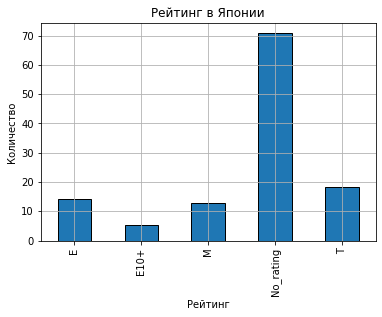

In [106]:
# посчитаем рейтинг в Японии
platform_2013_top.groupby('rating')['jp_sales'].agg('sum')\
.plot(kind='bar',stacked=True,grid=True,edgecolor='black')
plt.title('Рейтинг в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Количество')
plt.show()

В Японии предпочитают игры с рейтингом «T» («Teen») — «Подросткам» 

In [107]:
# посмотрим влияние рейтинга на регионы в % соотношении от общего объема
display(platform_2013_top.pivot_table(index=['rating'],values=['other_sales'],aggfunc=lambda x: x.sum())
 .apply(lambda col: col / col.sum(), axis=0).style.format("{:.1%}").background_gradient(cmap='Reds', axis=0)
 .set_caption("Влияние рейтинга на продажи в других регионах"))

,other_sales
rating,
E,18.5%
E10+,10.9%
M,39.9%
No_rating,20.1%
T,10.6%


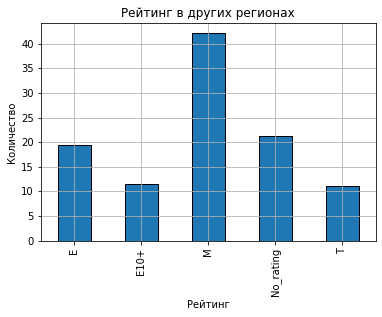

In [108]:
# посчитаем рейтинг в Японии
platform_2013_top.groupby('rating')['other_sales'].agg('sum')\
.plot(kind='bar',stacked=True,grid=True,edgecolor='black')
plt.title('Рейтинг в других регионах')
plt.xlabel('Рейтинг')
plt.ylabel('Количество')
plt.show()

В остальных регионах лидирует «M» («Mature») — «Для взрослых» 

 **Вывод:**


**Северная Америка**

-  На первом месте игры с рейтингом «M» («Mature») — «Для взрослых» 38,1 %
-  Второе место рейтинг «E» («Everyone») — «Для всех» 18,1 %
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше» на третьем месте с 12,8 %
-  На четветром месте «T» («Teen») — «Подросткам» с 10,4 %
- 38,1 % без рейтинга


**Европа**

-  На первом месте игры с рейтингом «M» («Mature») — «Для взрослых» 37,8 %
-  Второе место рейтинг «E» («Everyone») — «Для всех» 20,5 %
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше» на третьем месте с 11,4 %
-  На четветром месте «T» («Teen») — «Подросткам» с 11,4 %
- 37,8 % без рейтинга



**Япония**

- «T» («Teen») — «Подросткам» на первом месте с 15,1 %
- «E» («Everyone») — «Для всех» на втором месте с 11,6 %
- «M» («Mature») — «Для взрослых» 4 % на третьем месте с 10,6 %
- Замыкает рейтинг «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше» 4,5 %
- 58,2 % без рейтинга





- Между рынками есть разница по продажам игр разного возрастного рейтинга, это также связано с жанровыми предпочтениями, так к примеру жанр Action,который так любят в Северной Америке скорее всего имеет рейтинг «M» («Mature») — «Для взрослых» 
- Предпочтения Северной Америки и Европы  схожи, чего нельзя сказать о Японии, которая отдает предпочтение играм с рейтингом «T» («Teen») — «Подросткам»
- В Японии у более половины продаваемых игр просто нет рейтинга - видимо, для локальных игр он не требуется или устанавливается другой организацией (не ESRB), и у нас нет данных по нему

**Вывод:**


- В Северной Америке преобладают платформы PS4,X360,XOne и PS3, также выбирают жанры Action, а жанр Action,который так любят в Северной Америке скорее всего имеет рейтинг «M» («Mature») — «Для взрослых» 
- В Европе предпочитают PS4 и жанр Action
- Лидером по покупке игр 3DS, PS3, PSV является Япония, которя предпочитает жанр Role-Playing
- Предпочтения Северной Америки и Европы схожи, чего нельзя сказать о Японии, которая отдает предпочтение играм с рейтингом «T» («Teen») — «Подросткам»
- В Японии у половины продаваемых игр просто нет рейтинга - видимо, для локальных игр он не требуется или устанавливается другой организацией (не ESRB), и у нас нет данных по нему

## Проверим гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

### Гипотеза 1: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Формулируем нулевую гипотезу H₀, исходя из H₀ формулируем альтернативную гипотезу H₁.Оно может звучать так: «Средние пользовательские рейтинги платформ Xbox One и PC разные».

**Гипотеза**

H₀:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H₁:Средние пользовательские рейтинги платформ Xbox One и PC разные

In [109]:
display(platform_2013_top.query('platform in ["XOne", "PC"]').pivot_table(index='platform', values='user_score'))
xbox = platform_2013_top.query('platform == "XOne"').user_score.dropna()
pc = platform_2013_top.query('platform == "PC"').user_score.dropna()
# критический уровень статистической значимости
alpha = .05 
#будем считать, что генеральные совокупноси данных равны
results = st.ttest_ind(xbox, pc, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Нулевая гипотеза не верна")
else:
    print("Нулевая гипотеза верна")

,user_score
platform,
PC,6.258182
XOne,6.477586


p-значение: 0.2867036680187632
Нулевая гипотеза верна


**Вывод:**

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

### Гипотеза 2: cредние пользовательские рейтинги жанров Action и Sports разные

Формулируем нулевую гипотезу H₀, исходя из H₀ формулируем альтернативную гипотезу H₁.Оно может звучать так: «Средние пользовательские рейтинги жанров Action и Sports разные».

**Гипотеза**

H₀:Средние пользовательские рейтинги жанров Action и Sports одинаковые

H₁:Средние пользовательские рейтинги жанров Action и Sports разные

In [110]:
display(platform_2013_top.query('genre in ["Action", "Sports"]').pivot_table(index='genre', values='user_score'))
action = platform_2013_top.query('genre == "Action"').user_score.dropna()
sports = platform_2013_top.query('genre == "Sports"').user_score.dropna()
# критический уровень статистической значимости
alpha = .05 
#будем считать, что генеральные совокупноси данных равны
results = st.ttest_ind(action, sports, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Нулевая гипотеза не верна")
else:
    print("Нулевая гипотеза верна")

,user_score
genre,
Action,6.893092
Sports,5.179675


p-значение: 3.5076737062533683e-19
Нулевая гипотеза не верна


**Вывод:**

Средние пользовательские рейтинги жанров Action и Sports разные

## Общий вывод

- До 1995 г. продавалось совсем мало игр, к 2005 г. пошел рост покупок,а к 2008-2009 гг.,но с 2011 г. резкое снижение, что может быть обусловлено тем,что игры стали дорогими.Тогда же начали стремительно расти мобильные игры. Рынок стал перестраиваться на онлайновые рельсы. Многие разработчики, которым сложно было потянуть крупный онлайн-проект, уходили в новую нишу – браузерные игры, которые со временем потихоньку перетекли в мобильные игры и так далее.
- Платформы живут 6-11 лет и выход новой платформы приводит к падению продаж игр платформы более старой версии
- Наибольшие продажи показывает 3DS и PS3 за все годы
- Оценки пользователей и критиков слабо коррелируют с продажами
- По продажам за 2013-2015 гг. лидировали PS3,PS4,X360,пик продаж PS4 был в 2015 г.
- Игры в основном продаются до 5 млн. копий,но есть и явные лидеры у X360 и PS3, которые были проданы в количестве более 20 млн. экземпляров.
- В 3 лидеров попали:Grand Theft Auto V,Call of Duty: Modern Warfare 3,Call of Duty: Black Ops 3.
- Action самый выпускаемый и продаваемый жанр в Северной Америке, Европе и других регионах.
- В Северной Америке преобладают платформы PS4 и X360 , также выбирают жанры Action.
- В Европе предпочитают PS4 и жанр Action,также как и в других регионах.
- Лидером по покупке игр 3DS,PS3 и PSV является Япония, которая предпочитает жанр Role-Playing
- Предпочтения Северной Америки почти схожи с Европой, чего нельзя сказать о Японии, которая отдает предпочтение играм с рейтингом «T» («Teen») — «Подросткам»
- В Японии у половины продаваемых игр просто нет рейтинга - видимо, для локальных игр он не требуется или устанавливается другой организацией (не ESRB).
- Начали стремительно расти мобильные игры. Поскольку в новых условиях многие не готовы бежать за новой консолью, а вот смартфоны, которые после выхода iPhone заняли важнейшее место, пришлись очень кстати.
- Рынок видеоигр неоднороден – между регионами продаж и платформами есть заметные различия, которые, вероятно, объясняются разными предпочтениями пользователей. 
- Японские пользователи портативных приставок покупают совсем другие игры, чем американские геймеры на стационарных игровых консолях. 
- Для каждого региона и платформы есть свои топовые жанры и свой предел продаж.


**Предложение:**

- Для Северной Америки, Европы и других регионов создать рекламную кампанию для игр на платформе PS4 в жанре Action
- Для Японии создать рекламную кампанию для игр на платформе 3DS в жанре Role-Playing